In [1]:

## Use Julia Plots package and switch to plotly js option:
using Plots
pyplot()

#----------------------------------------------------------------------------

# First, we include Revise (good for debugging) and Parameters (tools for structures)

#using Revise
using Parameters
#----------------------------------------------------------------------------

# Now include the Land modules

using Land
using Land.CanopyRT
#----------------------------------------------------------------------------

LoadError: syntax: extra token "project" after end of expression

In [2]:
# Define a few wavelengths:
wl_blue = 450.0;
wl_red = 600.0;
wl_FarRed = 740.0;
wl_Red = 685.0;
ind_wle_blue  = argmin(abs.(wle .-wl_blue));
ind_wle_red = argmin(abs.(wle .-wl_red));
ind_wlf_FR  = argmin(abs.(wlf .-wl_FarRed));
ind_wlf_R  = argmin(abs.(wlf .-wl_Red));
ind_red = argmin(abs.(wl .-wl_Red));
ind_NIR = argmin(abs.(wl .-800));

In [23]:
const color_class = [collect(FT(1):FT(1):20)]

const dry_bnd = FT[[0.36,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.22,0.20,0.18,0.16,0.14,0.12,0.10,0.08] [0.61,0.57,0.53,0.51,0.49,0.48,0.45,0.43,0.41,0.39,0.37,0.35,0.33,0.31,0.29,0.27,0.25,0.23,0.21,0.16]];

const sat_bnd = FT[[0.25,0.23,0.21,0.20,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.10,0.09,0.08,0.07,0.06,0.05,0.04] [0.50,0.46,0.42,0.40,0.38,0.36,0.34,0.32,0.30,0.28,0.26,0.24,0.22,0.20,0.18,0.16,0.14,0.12,0.10,0.08]];


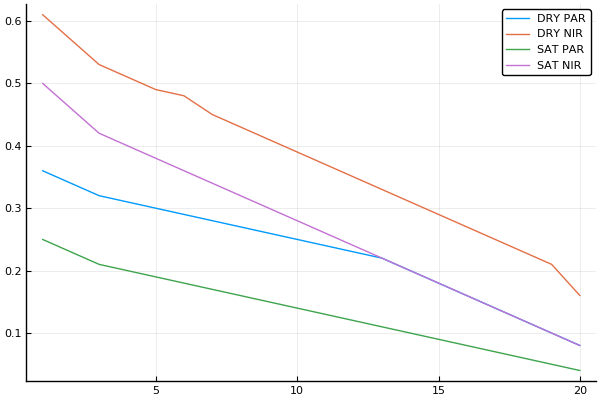

In [26]:
plot(color_class, dry_bnd, label=["DRY PAR" "DRY NIR"])
plot!(color_class, sat_bnd, label=["SAT PAR" "SAT NIR"])

In [80]:
function soil_albedo(color_class, soil_moisture)
    
  #soil moisture = the volumetric water content of the first soil layer theta1 mm3.mm-3;

  delta = 0.11 - 0.40*soil_moisture;

  delta = max(delta,0.0);
    
  CanopyRT.soil.albedo_SW[1:30] .= max(dry_bnd[color_class,1],sat_bnd[color_class,1]+delta);
  CanopyRT.soil.albedo_SW[31:114] .= max(dry_bnd[color_class,2],sat_bnd[color_class,2]+delta); 
    
  return CanopyRT.soil.albedo_SW
    
end;


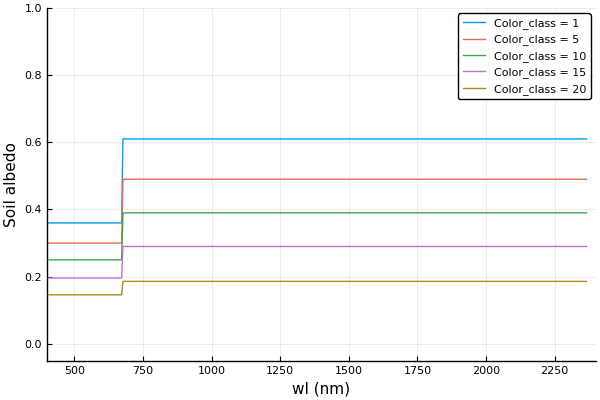

In [100]:

plot(wl,soil_albedo(1,0.01),label="Color_class = 1")
plot!(wl,soil_albedo(5,0.01),label="Color_class = 5")
plot!(wl,soil_albedo(10,0.01),label="Color_class = 10")
plot!(wl,soil_albedo(15,0.01),label="Color_class = 15")
plot!(wl,soil_albedo(20,0.01),label="Color_class = 20")

ylabel!("Soil albedo")
xlabel!("wl (nm)")

plot!(xlims = (400.0,2401.), ylims = (-0.05, 1.0), xticks = 0:250:2401., yticks = 0:0.2:1.0)

In [140]:
soil_albedo_var = []

  for soil_moisture=0.0:0.01:1.0
    push!(soil_albedo_var, soil_albedo(15,soil_moisture)[28])
  end

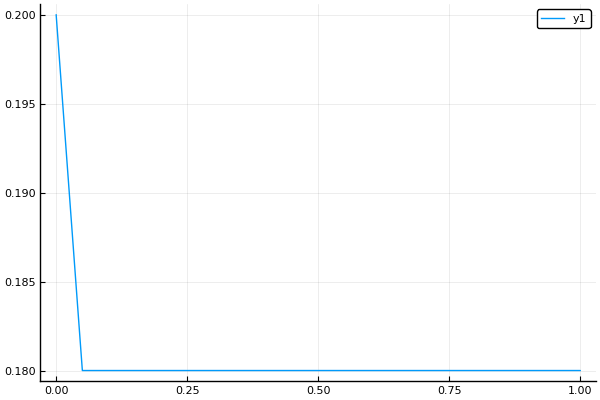

In [141]:
soil_moisture=0.0:0.01:1.0
plot(soil_moisture,soil_albedo_var)

ErrorException: could not open file /Users/braghier/Documents/CliMA/CliMA-land/Land/notebooks/literate_run_nbconvert.jl